#### TRANSLATION 


Nos gustaría que nuestra red reconozca el objeto presente en cualquier parte de la imagen. Además, el objeto puede estar presente parcialmente en la esquina o los bordes de la imagen. Por este motivo, cambiamos el objeto a varias partes de la imagen. Esto también puede resultar en la adición de un ruido de fondo. El fragmento de código muestra la traducción de la imagen en cuatro lados, conservando el 80 por ciento de la imagen base.


#### Ceil 

Devuelve el techo de x como un flotante, el valor entero más pequeño mayor que o igual a x.

#### Floor 

Devuelve el piso de x como un flotante, el valor entero más grande menor que o igual a x

#### NumPy

Es el paquete fundamental para la informática científica con Python. Contiene, entre otras cosas:

un poderoso objeto de matriz N-dimensional
funciones sofisticadas (difusion)
herramientas para integrar el codigo C / C ++ y Fortran
algebra lineal util, transformada de Fourier y capacidades de numeros aleatorios
Ademas de sus usos cientificos obvios, NumPy tambien se puede usar como un contenedor multidimensional 
eficiente de datos genericos. Se pueden definir tipos de datos arbitrarios. Esto permite a NumPy 
integrarse de manera rapida y sin problemas con una amplia variedad de bases de datos.

#### np.array

En general, los datos numéricos dispuestos en una estructura similar a una matriz en Python se pueden convertir en matrices mediante el uso de la función de matriz (). Los ejemplos más obvios son listas y tuplas. Consulte la documentación de array () para obtener detalles sobre su uso. Algunos objetos pueden admitir el protocolo de matriz y permitir la conversión a matrices de esta manera. Una forma simple de averiguar si el objeto se puede convertir en una matriz numpy usando una matriz () es simplemente intentarlo de manera interactiva y ver si funciona. (La forma de Python).

#### np.zeros

Devuelve una nueva matriz de forma y tipo, llena de ceros.

Parámetros:
forma: int o secuencia de ints

Forma de la nueva matriz, por ejemplo, (2, 3) o 2.

dtype: tipo de datos, opcional

El tipo de datos deseado para la matriz, por ejemplo, numpy.int8. El valor predeterminado es numpy.float64.

orden: {'C', 'F'}, opcional

Si se almacenan datos multidimensionales en orden C o Fortran contiguo (fila o columna) en la memoria.

Devoluciones:
fuera: ndarray

Matriz de ceros con la forma, el tipo y el orden dados.

#### Len 

El método len () devuelve la cantidad de elementos en la lista

#### Fill 

Ajusta el párrafo único en el texto y devuelve una sola cadena que contiene el párrafo ajustado.

#### tf.reset_default_graph

tf.reset_default_graph ()
Definido en tensorflow / python / framework / ops.py.

Consulte la guía: Elaboración de gráficos> Funciones de utilidad

Borra la pila de gráficos predeterminada y restablece el gráfico global predeterminado.

NOTA: El gráfico predeterminado es una propiedad del hilo actual. Esta función se aplica solo al hilo actual. Llamar a esta función mientras tf.Session o tf.InteractiveSession está activa dará como resultado un comportamiento indefinido. El uso de cualquier objeto tf.Operation o tf.Tensor previamente creado después de llamar a esta función dará como resultado un comportamiento indefinido.

#### tf.session

Una clase para ejecutar operaciones de TensorFlow.

Un objeto Session encapsula el entorno en el que se ejecutan los objetos Operation y se evalúan los objetos Tensor.

#### tf.image.extract_glimpse

Extrae un vistazo del tensor de entrada.

Devuelve un conjunto de ventanas llamadas destellos extraídos de los desplazamientos de ubicación del tensor de entrada. Si las ventanas solo se superponen parcialmente a las entradas, las áreas que no se superponen se llenarán de ruido aleatorio.

El resultado es un tensor 4-D de forma [batch_size, glimpse_height, glimpse_width, channels]. Los canales y las dimensiones del lote son los mismos que los del tensor de entrada. El alto y el ancho de las ventanas de salida se especifican en el parámetro de tamaño.

El argumento normalizado y centrado controla cómo se construyen las ventanas:

Si las coordenadas están normalizadas pero no centradas, 0.0 y 1.0 corresponden al mínimo y máximo de cada dimensión de altura y ancho.
Si las coordenadas están normalizadas y centradas, oscilan entre -1.0 y 1.0. Las coordenadas (-1.0, -1.0) corresponden a la esquina superior izquierda, la esquina inferior derecha está ubicada en (1.0, 1.0) y el centro está en (0, 0).
Si las coordenadas no están normalizadas, se interpretan como números de píxeles.

#### Extend 

El método extend () añade los contenidos de seq a list.




In [9]:
import tensorflow as tf 
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
IMAGE_SIZE = 224

def redimensionarImagenes(rutaDeArchivos):
    listaDeImagenes = []
    tf.reset_default_graph()
    imagenOriginal = tf.placeholder(tf.float32, (None, None, None))
    tf_img = tf.image.resize_images(imagenOriginal, (IMAGE_SIZE, IMAGE_SIZE), tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        # Each image is resized individually as different image may be of different size.
        
        for contador, rutaDeImagen in enumerate(rutaDeArchivos):
            print("Imagen # "+str(contador+1)+"/"+str(len(rutaDeArchivos))+" : "+str(rutaDeImagen))
            imagenDeEntrada = mpimg.imread(rutaDeImagen)[:, :, :3] # Do not read alpha channel.
            imagenConNuevoTamano = sess.run(tf_img, feed_dict = {imagenOriginal: imagenDeEntrada})
            imagenReparada= np.multiply(imagenConNuevoTamano, 1.0 / 255.0)
            listaDeImagenes.append(imagenReparada)
    listaDeImagenes = np.array(listaDeImagenes, dtype = np.float32) # Convert to numpy
    return listaDeImagenes

# Obtener imagenes
X_imgs = redimensionarImagenes(['/notebooks/imagenes/ropa/blusa1.jpg','/notebooks/imagenes/ropa/blusa2.jpg','/notebooks/imagenes/ropa/blusa3.jpg'])

Imagen # 1/3 : /notebooks/imagenes/ropa/blusa1.jpg
Imagen # 2/3 : /notebooks/imagenes/ropa/blusa2.jpg
Imagen # 3/3 : /notebooks/imagenes/ropa/blusa3.jpg


In [10]:
from math import ceil, floor #ceil redondea hacia arriba,  floor redondea hacia abajo

def obtener_parametros_a_traducir(index):
    if index == 0: # traducir 20% a la izquierda, cuando index es igual a 0 las imagenes se moveran hacia la izquierda tomando un 80% base de la imagen 
        conjunto = np.array([0.0, 0.2], dtype = np.float32)
        tamanio = np.array([IMAGE_SIZE, ceil(0.8 * IMAGE_SIZE)], dtype = np.int32)
        ancho_inicial = 0
        ancho_final = int(ceil(0.8 * IMAGE_SIZE))
        altura_inicial = 0
        altura_final = IMAGE_SIZE
    elif index == 1: # traducir 20% a la derecha, cuando index es igual a 1 las imagenes se moveran hacia la derecha tomando un 80% base de la imagen 
        conjunto = np.array([0.0, -0.2], dtype = np.float32)
        tamanio = np.array([IMAGE_SIZE, ceil(0.8 * IMAGE_SIZE)], dtype = np.int32)
        ancho_inicial = int(floor((1 - 0.8) * IMAGE_SIZE))
        ancho_final = IMAGE_SIZE
        altura_inicial = 0
        altura_final = IMAGE_SIZE
    elif index == 2: # Traducir 20% hacia arriba, cuando index es igual a 2 las imagenes se moveran hacia arriba tomando un 80% base de la imagen
        conjunto = np.array([0.2, 0.0], dtype = np.float32)
        tamanio = np.array([ceil(0.8 * IMAGE_SIZE), IMAGE_SIZE], dtype = np.int32)
        ancho_inicial = 0
        ancho_final = IMAGE_SIZE
        altura_inicial = 0
        altura_final = int(ceil(0.8 * IMAGE_SIZE)) 
    elif index == 3: # Traducir 20% hacia arriba, cuando index es igual a 2 las imagenes se moveran hacia arriba tomando un 80% base de la imagen
        conjunto = np.array([0.2, 0.2], dtype = np.float32)
        tamanio = np.array([ceil(0.8 * IMAGE_SIZE), IMAGE_SIZE], dtype = np.int32)
        ancho_inicial = 0
        ancho_final = IMAGE_SIZE
        altura_inicial = 0
        altura_final = int(ceil(0.8 * IMAGE_SIZE))
    elif index == 4: # Traducir 20% hacia arriba, cuando index es igual a 2 las imagenes se moveran hacia arriba tomando un 80% base de la imagen
        conjunto = np.array([-0.2, -0.2], dtype = np.float32)
        tamanio = np.array([ceil(0.8 * IMAGE_SIZE), IMAGE_SIZE], dtype = np.int32)
        ancho_inicial = 0
        ancho_final = IMAGE_SIZE
        altura_inicial = 0
        altura_final = int(ceil(0.8 * IMAGE_SIZE))
    elif index == 5: # traducir 20% a la derecha, cuando index es igual a 1 las imagenes se moveran hacia la derecha tomando un 80% base de la imagen 
        conjunto = np.array([-0.2, 0.2], dtype = np.float32)
        tamanio = np.array([IMAGE_SIZE, ceil(0.8 * IMAGE_SIZE)], dtype = np.int32)
        ancho_inicial = int(floor((1 - 0.8) * IMAGE_SIZE))
        ancho_final = IMAGE_SIZE
        altura_inicial = 0
        altura_final = IMAGE_SIZE
    elif index == 6: # traducir 20% a la derecha, cuando index es igual a 1 las imagenes se moveran hacia la derecha tomando un 80% base de la imagen 
        conjunto = np.array([-0.2, -0.2], dtype = np.float32)
        tamanio = np.array([IMAGE_SIZE, ceil(0.8 * IMAGE_SIZE)], dtype = np.int32)
        ancho_inicial = int(floor((1 - 0.8) * IMAGE_SIZE))
        ancho_final = IMAGE_SIZE
        altura_inicial = 0
        altura_final = IMAGE_SIZE
    else: # Traducir 20% hacia abajo, cuando index es igual a 3 las imagenes se moveran hacia abajo tomando un 80% base de la imagen 
        conjunto = np.array([-0.2, 0.0], dtype = np.float32)
        tamanio = np.array([ceil(0.8 * IMAGE_SIZE), IMAGE_SIZE], dtype = np.int32)
        ancho_inicial = 0
        ancho_final = IMAGE_SIZE
        altura_inicial = int(floor((1 - 0.8) * IMAGE_SIZE))
        altura_final = IMAGE_SIZE 
        
    return conjunto, tamanio, ancho_inicial, ancho_final, altura_inicial, altura_final

In [11]:
def translate_images(X_imgs):
    nuevo_conjunto = np.zeros((len(X_imgs), 2), dtype = np.float32) #UN NUEVO CONJUNTO DE UN ARREGLO DE TRADUCCIONES
    n_traducciones = 8 #EN ESTE CASO SON 4 LAS POSICIONES EN LAS QUE TRABAJAREMOS ARRIBA, ABAJO, IZQUIERDA, DERECHA
    conjunto_de_traducciones = [] # INICIANDO CONJUNTO DE TRADUCCIONES COMO ARREGLO
    
    tf.reset_default_graph()
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(n_traducciones):                      #
                           #np.zeros decuelve una nueva matriz de ceros con los parametros enviados 
            arreglo_traducciones = np.zeros((len(X_imgs), IMAGE_SIZE, IMAGE_SIZE, 3), 
                                    #len extrae la cantidad de elementos en este caso son tres imagenes
				    dtype = np.float32)
            arreglo_traducciones.fill(1.0) # rellena el color de fondo
            base_offset, tamanio, ancho_inicial, ancho_final, altura_inicial, altura_final = obtener_parametros_a_traducir(i)
            nuevo_conjunto[:, :] = base_offset 
            destellos = tf.image.extract_glimpse(X_imgs, tamanio, nuevo_conjunto)
            
            destellos = sess.run(destellos)
            arreglo_traducciones[:, altura_inicial: altura_inicial + tamanio[0], \
			 ancho_inicial: ancho_inicial + tamanio[1], :] = destellos
            conjunto_de_traducciones.extend(arreglo_traducciones) #al arreglo se le asigna las traducciones por el metodo extend
    conjunto_de_traducciones = np.array(conjunto_de_traducciones, dtype = np.float32)
    return conjunto_de_traducciones # RETORNA EL CONJUNTO DE TRADUCCIONES
	
translated_imgs = translate_images(X_imgs)

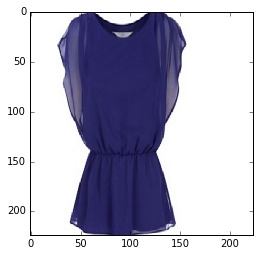

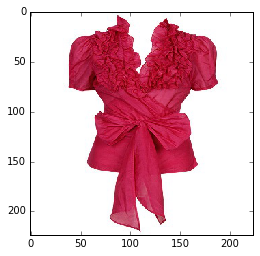

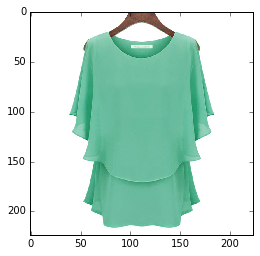

<type 'numpy.ndarray'>


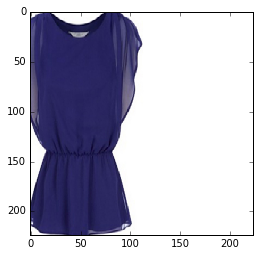

<type 'numpy.ndarray'>


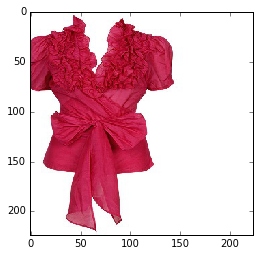

<type 'numpy.ndarray'>


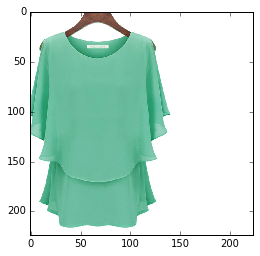

<type 'numpy.ndarray'>


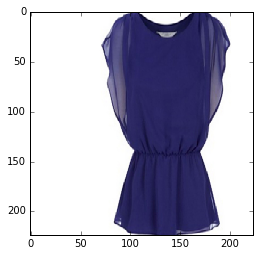

<type 'numpy.ndarray'>


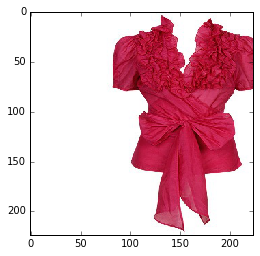

<type 'numpy.ndarray'>


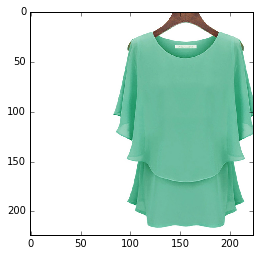

<type 'numpy.ndarray'>


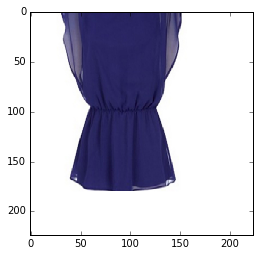

<type 'numpy.ndarray'>


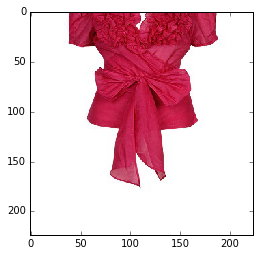

<type 'numpy.ndarray'>


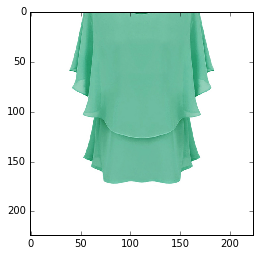

<type 'numpy.ndarray'>


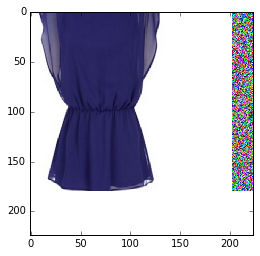

<type 'numpy.ndarray'>


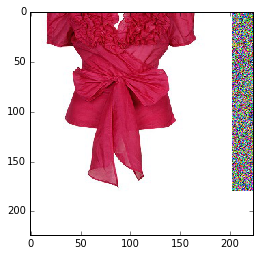

<type 'numpy.ndarray'>


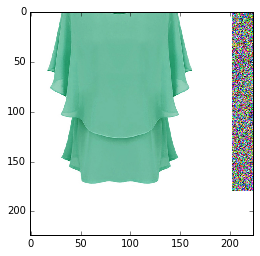

<type 'numpy.ndarray'>


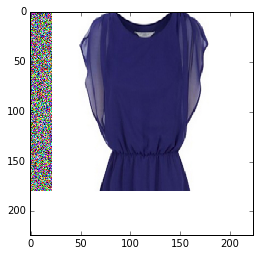

<type 'numpy.ndarray'>


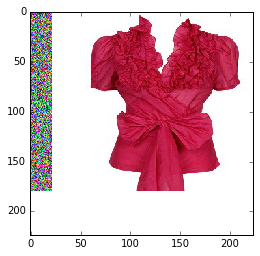

<type 'numpy.ndarray'>


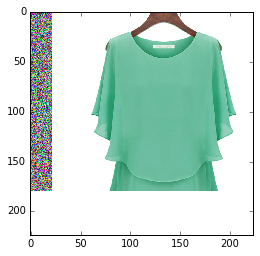

<type 'numpy.ndarray'>


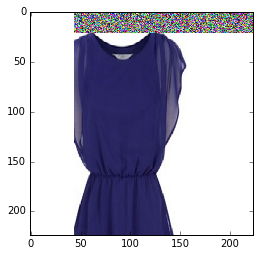

<type 'numpy.ndarray'>


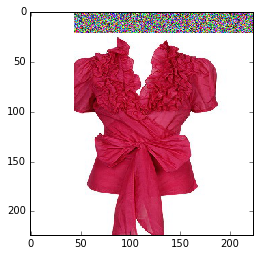

<type 'numpy.ndarray'>


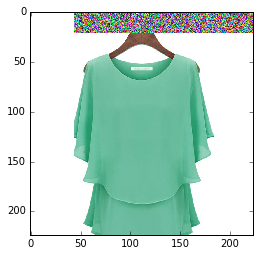

<type 'numpy.ndarray'>


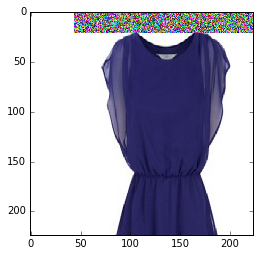

<type 'numpy.ndarray'>


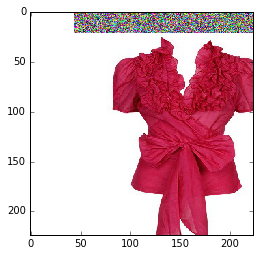

<type 'numpy.ndarray'>


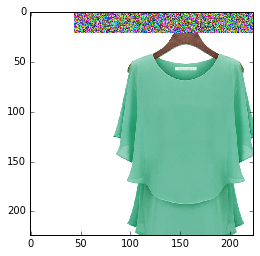

<type 'numpy.ndarray'>


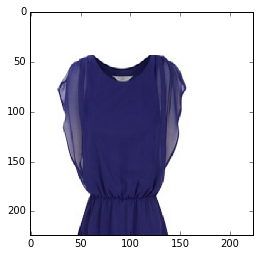

<type 'numpy.ndarray'>


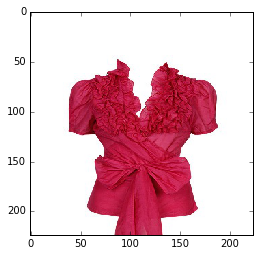

<type 'numpy.ndarray'>


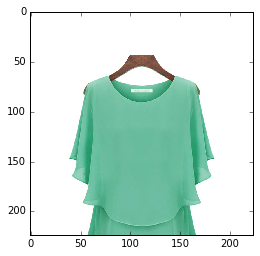

In [12]:
for imagen in X_imgs:
    imgplot = plt.imshow(imagen)
    plt.show()
    i=0
for image in translated_imgs: 
    i=i+1
    print type(image)
    plt.imshow(image)
    plt.savefig('DESTINO/Traduccion/MyNewImage'+str(i)+'.png')
    plt.show()

In [ ]:
redimensionarImagenes.save('/notebooks/imagenes/frutas/manazana_1.jpg'])